In [62]:
#age : age in years
#sex: (1 = male; 0 = female)
#cp: chest pain type
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg: resting electrocardiographic results
#thalach : maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#ca: number of major vessels (0-3) colored by flourosopy
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#num : target 1 or 0

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats
import seaborn as sns

In [64]:
clevDT = pd.read_csv('cleveland.csv')
clevDT.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [65]:
clevDT.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [66]:
clevDT.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [67]:
for i in range(0,clevDT.shape[1]):
    print(clevDT.columns.values[i],clevDT[clevDT.columns.values[i]].unique())


age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 56

In [68]:
clevDT[['ca','thal']] = clevDT[['ca','thal']].replace('[?]','0.0',regex=True)
clevDT = clevDT.astype('float64')
print(clevDT.ca.unique())
print(clevDT.thal.unique())

[0. 3. 2. 1.]
[6. 3. 7. 0.]


In [69]:
clevDT.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [264]:
X =clevDT.iloc[:,:-1] # This dataset takes all the columns except num
Y = clevDT.iloc[:,-1] # This dataset contains a=only num series
tempDT = pd.get_dummies(data=X,columns=['cp','restecg','slope','ca','thal'])
ClevDTNew = pd.concat([tempDT,Y],axis=1)
ClevDTNew.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_0.0,thal_3.0,thal_6.0,thal_7.0,num
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,1,1,0,0,0,0,0,1,0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,0,0,0,1,0,1,0,0,2.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,0,0,1,0,0,0,0,1,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,1,0,0,0,0,1,0,0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,1,0,0,0,0,1,0,0,0.0


In [298]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore') 
X= ClevDTNew.iloc[:,:-1].values
Y= ClevDTNew.iloc[:,-1].values

# Model Parameters Declaration

knn= NearestNeighbors(n_neighbors=10,metric='euclidean',p=2,algorithm='auto')
nn= KNeighborsClassifier(n_neighbors=40,metric='euclidean',p=2,algorithm='auto',weights='distance')
pca=PCA(n_components=2)
sc=StandardScaler()
minMax= MinMaxScaler(feature_range=(0,1))
#End

X=pca.fit_transform(X)
#X=minMax.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#print(X_train.shape)
#display(X)
acc_List=pd.Series()

cvList=pd.Series()
for i in range(80,120):
    nn= KNeighborsClassifier(n_neighbors=i,metric='euclidean',p=2,algorithm='auto',weights='distance')
    cvList=cvList.append(pd.Series(i))
    accuracies= cross_val_score(estimator= nn,X=X_train,y=y_train,cv=i,scoring="accuracy")
    acc_List=acc_List.append(pd.Series(accuracies.mean()))
display(pd.concat([cvList,acc_List],axis=1))
#cv=24,k=40,acc=60%

,0,1
0,80,0.724375
0,81,0.727778
0,82,0.731098
0,83,0.734337
0,84,0.737500
0,85,0.740588
0,86,0.743605
0,87,0.746552
0,88,0.749432
0,89,0.752247


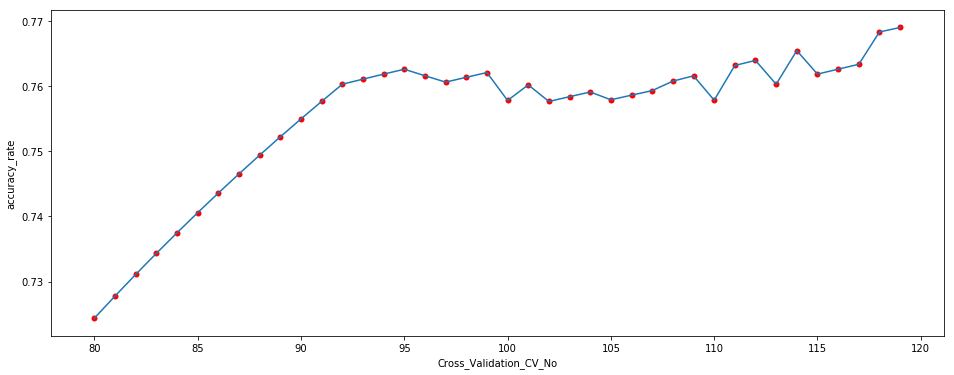

In [299]:
ax=plt.figure(figsize=(16,6))
ax=sns.lineplot(x=cvList,y=acc_List)
ax=sns.scatterplot(x=cvList,y=acc_List,color='red',linewidth=15)
ax.set_ylabel('accuracy_rate')
ax.set_xlabel('Cross_Validation_CV_No')
plt.show()

In [304]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,precision_recall_fscore_support,accuracy_score
import warnings
warnings.filterwarnings('ignore') 
X= ClevDTNew.iloc[:,:-1].values
Y= ClevDTNew.iloc[:,-1].values

# Model Parameters Declaration

knn= NearestNeighbors(metric='euclidean',p=2,algorithm='auto',radius=10)
sc=StandardScaler()
minMax= MinMaxScaler(feature_range=(0,1))
#pca=PCA(n_components=2)
#End
X=pca.fit_transform(X)
X = sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=47)
display(X_train.shape,X_test.shape)
fitData= knn.fit(X_train,y_train)
for i in range(80,120):
    distance,indices = fitData.kneighbors(X_train,n_neighbors=i)
    #print(indices.shape)
    y_train_Pred=[]
    for each in indices:
        list_Of_Y_train_val = [y_train[elem] for elem in each]
        y_train_Pred.append(stats.mode(list_Of_Y_train_val)[0][0])
    #print(y_train.shape,len(y_Pred))
    #print(i,f1_score(y_train_Pred,y_train,average='weighted'))
#display(X_test)
#fitData= knn.fit(X_test,y_test)
for i in range(80,120):
    distance,indices = fitData.kneighbors(X_test,n_neighbors=i)
    #print(indices)
    y_Pred=[]
    for each in indices:
        list_Of_Y_test_val = [Y[elem] for elem in each]
        y_Pred.append(stats.mode(list_Of_Y_test_val)[0][0])
    (p,r,f,s) = precision_recall_fscore_support(y_test, y_Pred)
    acc_score = accuracy_score(y_test, y_Pred)
    #print(y_train.shape,len(y_Pred))
    print(i,'f1_score:',f1_score(y_Pred,y_test,average='weighted'),'accuracy: ',acc_score)

(242, 2)

(61, 2)

80 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
81 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
82 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
83 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
84 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
85 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
86 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
87 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
88 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
89 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
90 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
91 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
92 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
93 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
94 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
95 f1_score: 0.8039215686274509 accuracy:  0.6721311475409836
96 f1_sc